In [167]:
%matplotlib ipympl

### Import the needed modules

In [166]:
from models import *
# from models import find_index_of_nearest
from impedance.preprocessing import readCSV, readBioLogic
from impedance.visualization import plot_nyquist,plot_bode
from impedance.models.circuits import CustomCircuit
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
from arbitau import give_z_for_arbitary_tau, tau_plotter
from scipy.integrate import solve_bvp

## Bring and plot your EIS data here
Check if its has come as it is

your first column should contain the frequency values, second column should contain the real part of the impedance, the third column should contain the imaginary part of the impedance

Please order the data in either ascending or descending order of frequency values

### Generate Synthetic Exp Data
We can generate synthetic data using any of our four default available profiles,
Or we can even generate the impedance data for any arbitray tortuosity profile given as a function of thickness fraction of electrode (this function should be a continous and differentiable function of x from x=0 to 1)

In [168]:
freq_list=np.logspace(-1,2,100)

##### Arbitary Tortuosity Profile

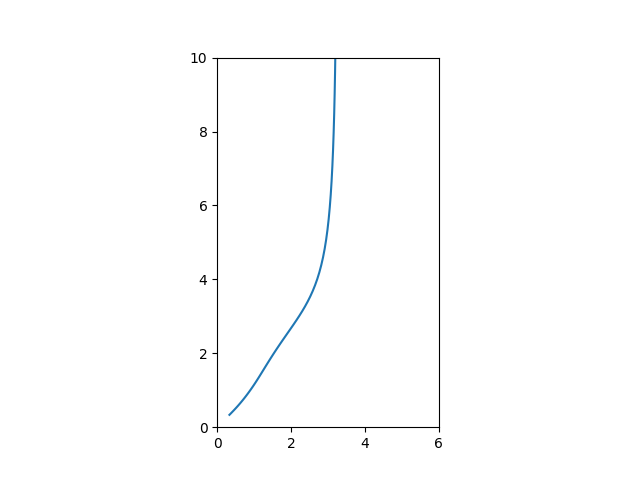

In [170]:
fig, ax=plt.subplots()
def tau9(x):
    return 5+np.tanh(x*10-3)+2*np.tanh(x*10-5)
zexp=give_z_for_arbitary_tau(tau9,freq_list,ax,"τ=*")

##### Default Tortuosity Profiles

In [85]:
#parameter for the TLM
Q=1e-6
alpha=1

R1=400
delta1=0.3
R2=400
R3=400
delta2=0.3


#initial guesses for the HFR intercept and for any semicircle like features in the EIS data
Rhfr=40
Rrxn=40
Qdl=1e-6
alpha2=1

#For Two-step provide R1,R2,Q,delta1,alpha
#For Three-step provide R1,R2,R3,Q,delta1,delta2,alpha
#For Linear provide R1,R2,Q,alpha
#For Inv-Linear provide R1,R2,Q,alpha

###For arbitary profile provide <what?>###
#write the profile that you want to fit
#tau should remain >=1 in the entire domain of the electrode
#for example, tau=1+np.sin(2*x)

In [86]:
#---uncomment the line below for fitting the uniform tortuosity profile---
#cmodel=CustomCircuit(initial_guess=[R1,Q,alpha,Rhfr,Rrxn,Qdl,alpha2],circuit="TLMuni_1-R_1-p(R_2,CPE_1)")

#cmodel=CustomCircuit(initial_guess=[R1,R1*Q,R2*Q,delta1,alpha,Rhfr,Rrxn,Qdl,alpha2],circuit="TLMtwo_1-R_1-p(R_2,CPE_1)")

cmodel=CustomCircuit(initial_guess=[R1,R1*Q,R2*Q,R3*Q,delta1,delta2,alpha,Rhfr,Rrxn,Qdl,alpha2],circuit="TLMthree_1-R_1-p(R_2,CPE_1)")

# cmodel=CustomCircuit(initial_guess=[R1,R1*Q,R2*Q,alpha,Rhfr,Rrxn,Qdl,alpha2],circuit="TLMlin_1-R_1-p(R_2,CPE_1)")

# cmodel=CustomCircuit(initial_guess=[R1,R1*Q,R2*Q,alpha,Rhfr,Rrxn,Qdl,alpha2],circuit="TLMilin_1-R_1-p(R_2,CPE_1)")

In [87]:
zexp=cmodel.predict(frequencies=freq_list)

C:\Users\admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\impedance\models\circuits\circuits.py:145: UserWarning: Simulating circuit based on initial parameters
  return eval(buildCircuit(self.circuit, frequencies,


### Bring Experimental Data

In [145]:
#freq, zexp = readBioLogic("exampleData.mpt")
#freq, zexp = ("exampleData.mpt")
# freq, zexp = readCSV("hello.csv")
freq_list, zexp = readCSV("./zdata3.csv")
##-----------##
#put the nyquist and the bode plot on the same figure

### Plot the impedance Data

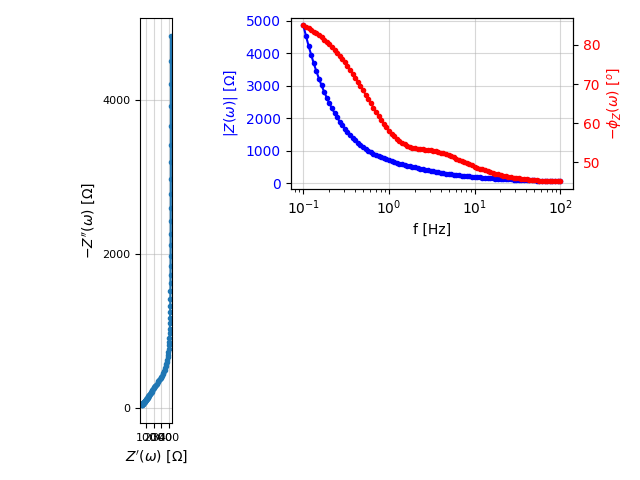

In [171]:
fig= plt.figure()
ax_nyq=fig.add_subplot(121)
ax_mag=fig.add_subplot(222)
ax_phs=ax_mag.twinx()

#plot nyquist plot of the taken data
plot_nyquist(zexp,ax=ax_nyq,labelsize=10,ticksize=8)

#plot bode plot of the taken data
ax_mag.plot(freq_list, np.abs(zexp), '.-', color="blue")
ax_phs.plot(freq_list, -np.angle(zexp, deg=True), '.-',color="red")
ax_mag.set_ylabel(r'$|Z(\omega)|$ ' +'$[{}]$'.format("Ω"), fontsize=10,color="blue")
ax_phs.set_ylabel(r'$-\phi_Z(\omega)$ ' + r'$[^o]$', fontsize=10,color="red")
ax_mag.set_xlabel('f [Hz]', fontsize=10)
ax_mag.set_xscale('log')
ax_mag.tick_params(axis='y', labelcolor="blue")
ax_phs.tick_params(axis='y', labelcolor="red")
ax_mag.grid(visible=True, which='major', axis='both', alpha=.5)
fig.tight_layout()

### Provide the frequency range in which you want to fit

In [172]:
f_high=1e1
f_low=1e-1
#high low should be between the actual available range of freq, not out of that otherwise how will we have the impedance data at those frequencies
fhigh_idx=find_index_of_nearest(freq_list,f_high)
flow_idx=find_index_of_nearest(freq_list,f_low)
print(fhigh_idx," ",flow_idx)

#crop the data, that falls in this frequency range
if(fhigh_idx<flow_idx):
    freq_to_fit=freq_list[fhigh_idx:flow_idx]
    zexp_to_fit=zexp[fhigh_idx:flow_idx]
else:
    freq_to_fit=freq_list[flow_idx:fhigh_idx]
    zexp_to_fit=zexp[flow_idx:fhigh_idx]


66   0


##### See the data for the freq range that you have choosen

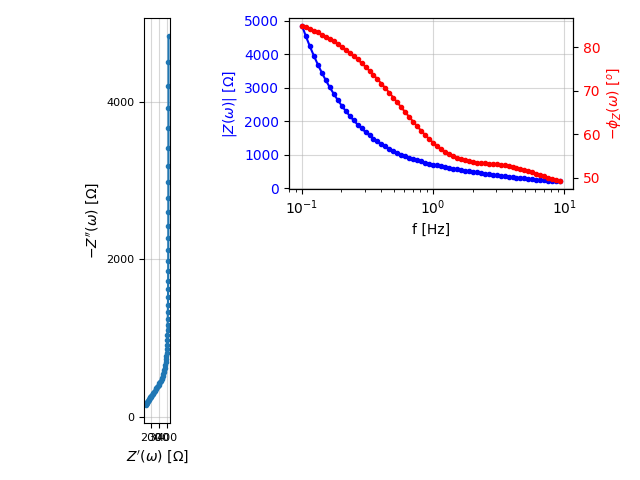

In [173]:
##-----------##
#put the nyquist and the bode plot on the same figure

fig= plt.figure()
ax_nyq=fig.add_subplot(121)
ax_mag=fig.add_subplot(222)
ax_phs=ax_mag.twinx()

#plot nyquist plot of the taken data
plot_nyquist(zexp_to_fit,ax=ax_nyq,labelsize=10,ticksize=8)

#plot bode plot of the taken data
mag_color="blue"
phs_color="red"
ax_mag.plot(freq_to_fit, np.abs(zexp_to_fit), '.-', color=mag_color)
ax_phs.plot(freq_to_fit, -np.angle(zexp_to_fit, deg=True), '.-',color=phs_color)
ax_mag.set_ylabel(r'$|Z(\omega)|$ ' +'$[{}]$'.format("Ω"), fontsize=10,color=mag_color)
ax_phs.set_ylabel(r'$-\phi_Z(\omega)$ ' + r'$[^o]$', fontsize=10,color=phs_color)
ax_mag.set_xlabel('f [Hz]', fontsize=10)
ax_mag.set_xscale('log')
ax_mag.tick_params(axis='y', labelcolor=mag_color)
ax_phs.tick_params(axis='y', labelcolor=phs_color)
ax_mag.grid(visible=True, which='major', axis='both', alpha=.5)
fig.tight_layout()

#### Choose the inhomogenity profile of tortuosity and provide the initial guesses for the parameters
The following profiles are available

1. Uniform tortuosity
2. Two-Step inhomogenity in tortuosity
3. Three-Step
4. Linearly varying toruosity
5. Inverse-Linear

You can also select all the profiles at once and see which one fits better:
using the ...........(to be conti.)


In [174]:
#initial guesses for the TLM
Q=6.61e-4
alpha=1

R1=400
delta1=0.3
R2=400
R3=400
delta2=0.3


#initial guesses for the HFR intercept and for any semicircle like features in the EIS data
Rhfr=40
Rrxn=40
Qdl=1e-6
alpha2=1

#other (for arbitrary tortuosity profile)
Rref=194.56
a=3
b=5

#For Two-step provide R1,R2,Q,delta1,alpha
#For Three-step provide R1,R2,R3,Q,delta1,delta2,alpha
#For Linear provide R1,R2,Q,alpha
#For Inv-Linear provide R1,R2,Q,alpha

###For arbitary profile provide <what?>###
#write the profile that you want to fit
#tau should remain >=1 in the entire domain of the electrode
#for example, tau=1+np.sin(2*x)

### Choose any of the default profiles

In [153]:
#---uncomment the line below for fitting the uniform tortuosity profile---

#cmodel=CustomCircuit(initial_guess=[R1,Q,alpha,Rhfr,Rrxn,Qdl,alpha2],circuit="TLMuni_1-R_1-p(R_2,CPE_1)")

#cmodel=CustomCircuit(initial_guess=[R1,R1*Q,R2*Q,delta1,alpha,Rhfr,Rrxn,Qdl,alpha2],circuit="TLMtwo_1-R_1-p(R_2,CPE_1)")

cmodel=CustomCircuit(initial_guess=[R1,R1*Q,R2*Q,R3*Q,delta1,delta2,alpha,Rhfr,Rrxn,Qdl,alpha2],circuit="TLMthree_1-R_1-p(R_2,CPE_1)")

# cmodel=CustomCircuit(initial_guess=[R1,R1*Q,R2*Q,alpha,Rhfr,Rrxn,Qdl,alpha2],circuit="TLMlin_1-R_1-p(R_2,CPE_1)")

# cmodel=CustomCircuit(initial_guess=[R1,R1*Q,R2*Q,alpha,Rhfr,Rrxn,Qdl,alpha2],circuit="TLMilin_1-R_1-p(R_2,CPE_1)")


### Provide an arbitray Tortuosity Profile

In [188]:
#-- uncomment the line below for fitting an arbitrary tortuosity profile--#

@element(num_params=4,units=["","","",""],overwrite=True)
def arbitau(p,f):
    # modify the number of parameters according to the torutosity function
    Rref, Q, a, b = p[0], p[1], p[2], p[3]
    # provide the definition for the arbitrary tortuosity function
    
    def tau(x):
        # return 5+np.tanh(x*10-3)+2*np.tanh(x*10-5)
        return 5+np.tanh(x*10-a)+2*np.tanh(x*10-b)
    
    def fun(x,y,lmd):
        return np.vstack((y[2]*tau(x),y[3]*tau(x),-lmd*y[1],lmd*y[0]))

    def bc(ya,yb):
        return np.array([ya[0]-1,yb[2],yb[3],ya[1]])

    # Q=6.61e-4
    # Rref=194.56

    x=np.linspace(0,1,1000)
    y=np.zeros((4,x.size))

    Z_list=np.zeros((np.size(freq_list),1),dtype=complex)

    ii=0
    for freq in np.array(f):
        w=2*np.pi*freq
        lmd2=w*Q*Rref
        sol1 = solve_bvp(lambda x,y: fun(x,y,lmd=lmd2), bc, x, y)
        y3=sol1.sol(x)[2]
        y4=sol1.sol(x)[3]
        Z=2/(-(1/(Rref))*(y3[0]+y4[0]*1j)) 
        Z_list[ii]=Z
        ii=ii+1

    return Z_list

cmodel=CustomCircuit(initial_guess=[Rref,Q,a,b,Rhfr,Rrxn,Qdl,alpha2],circuit="arbitau_1-R_1-p(R_2,CPE_1)")

print(cmodel)
zzz=cmodel.predict(frequencies=freq_to_fit)


Circuit string: arbitau_1-R_1-p(R_2,CPE_1)
Fit: False

Initial guesses:
  arbitau_1_0 = 1.95e+02 []
  arbitau_1_1 = 6.61e-04 []
  arbitau_1_2 = 3.00e+00 []
  arbitau_1_3 = 5.00e+00 []
    R_1 = 4.00e+01 [Ohm]
    R_2 = 4.00e+01 [Ohm]
  CPE_1_0 = 1.00e-06 [Ohm^-1 sec^a]
  CPE_1_1 = 1.00e+00 []



C:\Users\admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\impedance\models\circuits\circuits.py:145: UserWarning: Simulating circuit based on initial parameters
  return eval(buildCircuit(self.circuit, frequencies,


ValueError: operands could not be broadcast together with shapes (100,100) (66,) (100,100) 

### Choose weighing method and the algorithm for the fitting

In [184]:
#wt="unit"
wt="mod"
#wt="prop"

def give_weights(z,wt):
    if (wt=="mod"):
        return np.concatenate((np.abs(z),np.abs(z)))
    elif (wt=="prop"):
        return np.concatenate((np.real(z),np.imag(z)))
    elif (wt=="" or wt=="unit"):
        return np.ones(2*len(z))
    
#cmodel.fit(impedance=zexp,frequencies=freq,sigma=give_weights(zexp,wt),bounds=[(0,0,0.5,0.5),(np.inf,np.inf,1)])

##Three Step Fitting
#cmodel.fit(impedance=zexp,frequencies=freq_list,sigma=give_weights(zexp,wt),bounds=[(0,0,0,0,0,0,0.5,0,0,0,0.5),(np.inf,np.inf,np.inf,np.inf,1,1,1,np.inf,np.inf,np.inf,1)])

#cmodel.fit(impedance=zout,frequencies=f,bounds=[(0,0,0,0,0,0,0.5),(np.inf,np.inf,np.inf,np.inf,1,1,1)])
#cmodel.fit(impedance=zout,frequencies=f,bounds=[(0,0,0,0.5),(np.inf,np.inf,np.inf,1)])
#cmodel.fit(impedance=zout,frequencies=f,bounds=[(0,0,0,0.5),(np.inf,np.inf,np.inf,1)])

# print(give_weights(zexp,wt))
# print(zexp)

# fit the arbitrary profile with a and b as unknowns
# cmodel.fit(impedance=zexp,frequencies=freq_list,sigma=give_weights(zexp,wt),bounds=[(0,0,0,0,0,0,0,0.5),(np.inf,np.inf,np.inf,np.inf,np.inf,np.inf,np.inf,1)])
cmodel.fit(impedance=zexp,frequencies=freq_list,bounds=[(0,0,0,0,0,0,0,0.5),(np.inf,np.inf,np.inf,np.inf,np.inf,np.inf,np.inf,1)])


ValueError: operands could not be broadcast together with shapes (100,200) (100,2) 

### Print The fitted Model

In [177]:
print(cmodel)


Circuit string: arbitau_1-R_1-p(R_2,CPE_1)
Fit: False

Initial guesses:
  arbitau_1_0 = 1.95e+02 []
  arbitau_1_1 = 6.61e-04 []
  arbitau_1_2 = 3.00e+00 []
  arbitau_1_3 = 5.00e+00 []
    R_1 = 4.00e+01 [Ohm]
    R_2 = 4.00e+01 [Ohm]
  CPE_1_0 = 1.00e-06 [Ohm^-1 sec^a]
  CPE_1_1 = 1.00e+00 []



### Print the parameters of the model with their actual names

In [67]:
# def print_model(circuit):
#     if(circuit._is_fit()):
#         print("The circuit is fit already")
#         print("\nBelow we are printing the values of parameters for the circuit\n")
#         param=cmodel.parameters_
#         cname=cmodel.circuit
#         if(cname.find("TLMtwo")>=0):
#             print("R1 : ",param[0])
#             print("R2 : ",param[2]*param[0]/param[1])
#             print("Q : ",param[1]/param[0])
#             print("δ1 : ",param[3])
#             print("α : ",param[4])
#             print("Rhfr : ",param[5])
#             print("Rrxn : ",param[6])
#             print("Q2 : ",param[7])
#             print("α2 : ",param[8])
#         # if(cname.find("TLMthree")>=0):
#         #     print()
#         # if(cname.find("TLMlin")>=0):
#         #     print()
#         # if(cname.find("TLMilin")>=0):
#         #     print()
#     else:
#         print("The circuit is not fit yet")
        
# print_model(circuit=cmodel)

In [178]:
# f_high=1e4
# f_low=1e-1
# ff=np.logspace(4,-1)
z_fit=cmodel.predict(frequencies=freq_to_fit)

### See how the model fits to the data

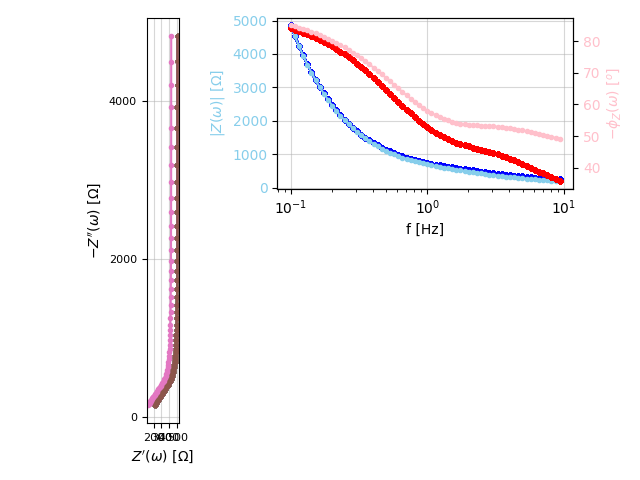

In [180]:
##-----------##
#put the nyquist and the bode plot on the same figure

fig= plt.figure()
ax_nyq=fig.add_subplot(121)
ax_mag=fig.add_subplot(222)
ax_phs=ax_mag.twinx()

#plot nyquist plot of the taken data
plot_nyquist(z_fit,ax=ax_nyq,labelsize=10,ticksize=8)

#plot bode plot of the taken data
mag_color="blue"
phs_color="red"
ax_mag.plot(freq_to_fit, np.abs(z_fit), '.-', color=mag_color)
ax_phs.plot(freq_to_fit, -np.angle(z_fit, deg=True), '.-',color=phs_color)
ax_mag.set_ylabel(r'$|Z(\omega)|$ ' +'$[{}]$'.format("Ω"), fontsize=10,color=mag_color)
ax_phs.set_ylabel(r'$-\phi_Z(\omega)$ ' + r'$[^o]$', fontsize=10,color=phs_color)
ax_mag.set_xlabel('f [Hz]', fontsize=10)
ax_mag.set_xscale('log')
ax_mag.tick_params(axis='y', labelcolor=mag_color)
ax_phs.tick_params(axis='y', labelcolor=phs_color)
ax_mag.grid(visible=True, which='major', axis='both', alpha=.5)
fig.tight_layout()


########
##-----------##
#put the nyquist and the bode plot on the same figure

#plot nyquist plot of the taken data
plot_nyquist(zexp_to_fit,ax=ax_nyq,labelsize=10,ticksize=8)

#plot bode plot of the taken data
mag_color="SkyBlue"
phs_color="pink"
ax_mag.plot(freq_to_fit, np.abs(zexp_to_fit), '.-', color=mag_color)
ax_phs.plot(freq_to_fit, -np.angle(zexp_to_fit, deg=True), '.-',color=phs_color)
ax_mag.set_ylabel(r'$|Z(\omega)|$ ' +'$[{}]$'.format("Ω"), fontsize=10,color=mag_color)
ax_phs.set_ylabel(r'$-\phi_Z(\omega)$ ' + r'$[^o]$', fontsize=10,color=phs_color)
ax_mag.set_xlabel('f [Hz]', fontsize=10)
ax_mag.set_xscale('log')
ax_mag.tick_params(axis='y', labelcolor=mag_color)
ax_phs.tick_params(axis='y', labelcolor=phs_color)
ax_mag.grid(visible=True, which='major', axis='both', alpha=.5)
fig.tight_layout()

In [181]:
from models import profile_plotter 

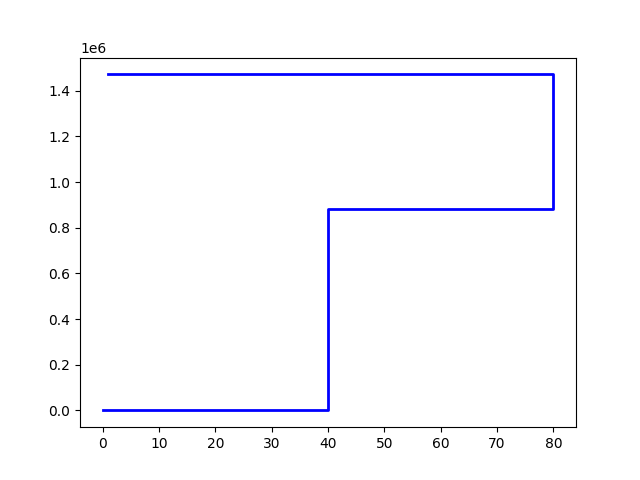

In [182]:
fig, ax= plt.subplots()
# profile_plotter(circuit=c1,ax=ax)
profile_plotter(profile="TLMthree",circuit=cmodel,ax=ax)
circuit=cmodel
if(circuit._is_fit()):
        param=circuit.parameters_
else:
        param=circuit.initial_guess

Rref=param[0]
Q=param[1]
a=param[2]
b=param[3]

def tau_plotter(tau,ax,name):
    x=np.linspace(0,1,100)
    ax.plot(x,tau(x),label=name)

plt.show()
# print(cthree)
# ztwo1=c1.predict(frequencies=f)
# zthree1=cthree.predict(frequencies=f)
# fig, ax1 = plt.subplots()
# models.error_plotter(f,ztwo1,zthree1,ax=ax1)

### Notes
Change the print function to directly print name of the parameters
